In [215]:
from matplotlib import pyplot as plt
import numpy as np


In [216]:
ngram = np.array([
    53, 56, 56, 57, 50, 33,
    54, 56, 57, 58, 53, 33,
    55, 58, 57, 57, 55, 33,
    55, 58, 58, 58, 54, 33,
    56, 58, 57, 58, 56, 33,
    55, 56, 58, 57, 50, 33
]).reshape(6, 6)

bert = np.array([
    82, 82, 82, 82, 81, 49,
    84, 83, 83, 81, 80, 62,
    82, 85, 84, 84, 83, 64,
    85, 84, 83, 82, 83, 51,
    84, 84, 83, 84, 84, 66,
    81, 84, 84, 86, 82, 58
]).reshape(6, 6)


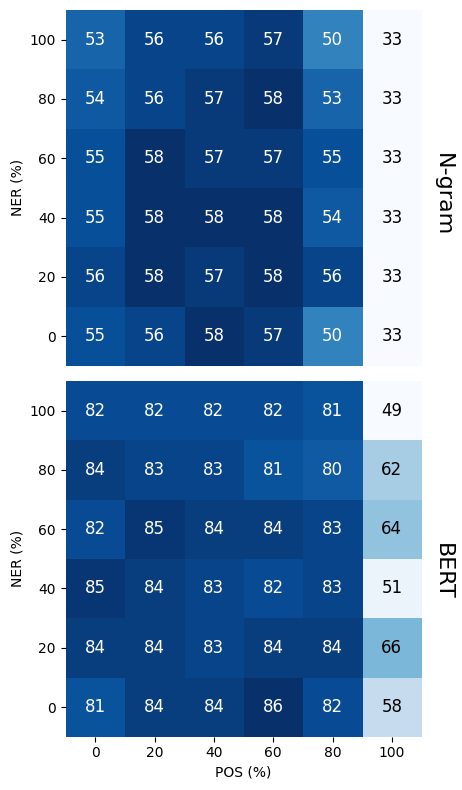

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ngram and bert are already defined as 6x6 numpy arrays

fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Common properties
cmap = 'Blues'
text_color = 'black'
fontsize = 12
yticks_labels = ['0', '20', '40', '60', '80', '100'][::-1]
xticks_labels = ['0', '20', '40', '60', '80', '100']

# Function to create a heatmap
def create_heatmap(data, ax, yticks, xticks=None):
    im = ax.imshow(data, cmap=cmap)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i, j] > 50:
                ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=fontsize)
            else:
                ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color=text_color, fontsize=fontsize)
    ax.set_yticks(np.arange(len(yticks)), labels=yticks)
    if xticks:
        ax.set_xticks(np.arange(len(xticks)), labels=xticks)

im = ax[0].imshow(ngram, cmap=cmap)
for i in range(ngram.shape[0]):
    for j in range(ngram.shape[1]):
        if ngram[i, j] >= 50:
            ax[0].text(j, i, f'{ngram[i, j]}', ha='center', va='center', color='white', fontsize=fontsize)
        else:
            ax[0].text(j, i, f'{ngram[i, j]}', ha='center', va='center', color=text_color, fontsize=fontsize)
ax[0].set_yticks(np.arange(len(yticks_labels)), labels=yticks_labels)
ax[0].set_ylabel('NER (%)')
ax[0].xaxis.set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)


# Plot bert heatmap
im = ax[1].imshow(data, cmap=cmap)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j] > 75:
            ax[1].text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=fontsize)
        else:
            ax[1].text(j, i, f'{data[i, j]}', ha='center', va='center', color=text_color, fontsize=fontsize)
ax[1].set_yticks(np.arange(len(yticks_labels)), labels=yticks_labels)
ax[1].set_xticks(np.arange(len(xticks_labels)), labels=xticks_labels)
ax[1].set_xlabel('POS (%)')
ax[1].set_ylabel('NER (%)')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

# Add titles to the right side of each heatmap
fig.text(0.9, 0.75, 'N-gram', ha='center', va='center', fontsize=16, rotation=-90)
fig.text(0.9, 0.28, 'BERT', ha='center', va='center', fontsize=16, rotation=-90)


# Show the plot
plt.tight_layout()
#save image
plt.savefig('heatmap.png', dpi=200, bbox_inches='tight')

plt.show()


## Bar Plot

In [213]:
{
    "frmt": {        
        "ngram": 0.4695,
        "bert": 0.6881,
        "ngram_d": 0.5984,
        "bert_d": 0.7725,

    },
    "dsl": {
        "ngram": 0.7534,
        "bert": 0.8126,
        "ngram_d": 0.7619,
        "bert_d": 0.8497,


    }
}

{'frmt': {'ngram': 0.4695,
  'bert': 0.6881,
  'ngram_d': 0.5984,
  'bert_d': 0.7725},
 'dsl': {'ngram': 0.7534, 'bert': 0.8126, 'ngram_d': 0.7619, 'bert_d': 0.8497}}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


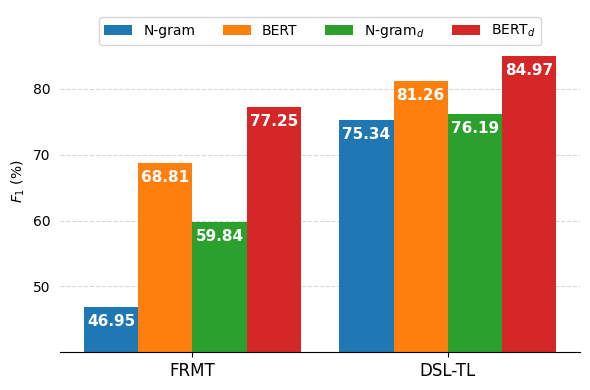

In [212]:
# trigger core fonts for PDF backend
plt.rcParams["pdf.use14corefonts"] = True
# trigger core fonts for PS backend
plt.rcParams["ps.useafm"] = True

labels = ['FRMT', 'DSL-TL']
ngram= [46.95, 75.34]
ngram_d= [59.84, 76.19]
bert= [68.81, 81.26]
bert_d= [77.25, 84.97]


x = np.array([0, 4])  # the label locations
width = 0.85  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - 3 * width/2 , ngram, width, label='N-gram')
rects2 = ax.bar(x -  width / 2, bert, width, label='BERT')
rects3 = ax.bar(x +  width / 2, ngram_d, width, label='N-gram$_d$')
rects4 = ax.bar(x + 3 * width / 2, bert_d, width, label='BERT$_d$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$F_1$ (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc='upper center', ncols=4)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height - 4),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=11, color='white', fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# remove y ticks
ax.yaxis.set_ticks_position('none', )
ax.yaxis.set_tick_params(width=0)
ax.grid(axis='y', alpha=0.5, linestyle = '--')
ax.set_axisbelow(True)
ax.get_yaxis().set_ticks([50, 60, 70, 80])


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

ax.set_ylim(40, 92)

# save image
plt.savefig('f1.eps', dpi=300, bbox_inches='tight')
plt.show()
